### Functions

In [1]:



_nsre = re.compile('([0-9]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)] 

NameError: name 're' is not defined

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.transform import Rotation as R



In [2]:
def rotate(origin, point, angle):
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    
    return qx, qy

def rotate2(origin, point, angle):
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    
    return qx, qy

In [3]:
def getmaxbetween(x, y, xval1,xval2,ymin):
    xnew = []
    ynew = []
    for index, value in enumerate(x):
        if (value > xval1) & (value < xval2):
            if (y[index] < ymin):
                xnew.append(value)
                ynew.append(y[index])
    ymax = max(ynew)
    #xpos = y.index(ymax)
    return ymax

In [4]:
timestep = 1
z_pos = 1.0
import fileinput
from decimal import Decimal as D
#Function to edit
def getdf(filenames,timestep,z_pos):
    t = 0
    for file in filenames:
        if t == timestep:
            #print(file)
            dfname =  pd.read_csv(file, delim_whitespace=True)
            dfname.columns= ['x','y']
        t = t + 1
    return dfname

In [101]:
theta = -0.268  # 90 degree
ox, oy = 0, 0  # point to rotate about
A = np.matrix([[np.cos(theta), -np.sin(theta)],
               [np.sin(theta), np.cos(theta)]])


import statistics
#Get x,y and rotate from first
def getxy(yminus,filenames,timestep,z_pos): #minus takes values 1 if water, anything else (manual) if flow
    dfname = getdf(filenames,timestep,z_pos)
    dfname = dfname.sort_values(by=['x'])
    x = round(dfname["x"],10)
    y = round(dfname["y"],10)
    
    #xy = np.column_stack((x,y))
    #print(xy)
    #w = np.zeros(xy.shape)
    #xy_shifted = xy-np.array([ox,oy])
    #for i,v in enumerate(xy_shifted):
    #      w[i] = A @ v
    
    transform = []
    origin = (0,0)
    rad = -15.35000000000
    x1 = [x - 1.338 for x in x1]
    for j in range(len(x)):
        point = (x[j], y[j] )
        myplot = rotate(origin, point, math.radians(rad)) #prints x, y of rotaed point
        myplot = (myplot[0], myplot[1]-dfname["y"].iloc[-1])
        transform.append(myplot) 
    #Then need to do the adjustment
    
    newdf = pd.DataFrame(transform,columns = ['x','y'])
    #print(w)
    
    #Remove all values of x under a 1.338
    #remove all values of y under 0....
    return w, newdf

### Plots

In [102]:
myfolder = "18.5_0.1/b_0.0/" 
#myfolder = "b_0.001_12_long_air2/" 
water_filenames = sorted(glob.glob(myfolder + "/water_elevation*.txt"), key = natural_sort_key) 
#flow_filenames = sorted(glob.glob("/home/lbat537/nobackup/lily/three-phase/tilted_domain_final/bview_3d_mpi/flow*.csv"), key = natural_sort_key) 


[[0.00000e+00 8.73566e-04]
 [1.34150e-03 0.00000e+00]
 [1.95312e-03 8.00297e-04]
 ...
 [7.99805e+00 1.82893e+00]
 [7.99805e+00 1.82878e+00]
 [8.00000e+00 1.82916e+00]]
[[ 2.31323214e-04  8.42381818e-04]
 [ 1.29361171e-03 -3.55233711e-04]
 [ 2.09531970e-03  2.54535599e-04]
 ...
 [ 8.19684588e+00 -3.54268889e-01]
 [ 8.19680615e+00 -3.54413535e-01]
 [ 8.19878717e+00 -3.54563466e-01]]


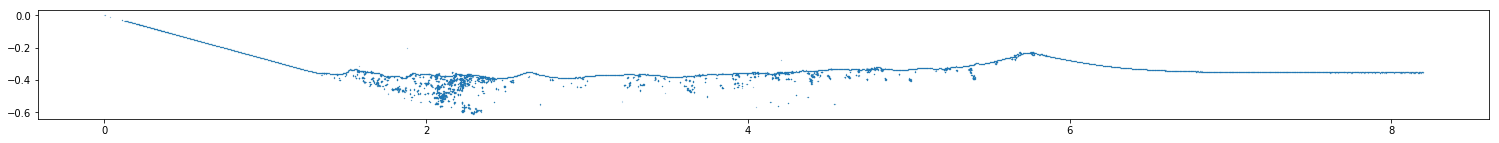

In [103]:
fig = plt.figure(figsize=(26, 2))
ax = fig.add_subplot(111)
#def getxy(xminus,yminus,filenames,timestep,z_pos):
w,newdf = getxy(1,water_filenames,300,2)
#scaler=MinMaxScaler(feature_range=(0,6))
#newdf["x"]=scaler.fit_transform(newdf[["x"]])
plt.scatter(w[:,0],w[:,1], s=0.01)
#ymax = getmaxbetween(newdf['x'],y,2,3,0.149)
#xpos = y.index(ymax)
#xmax = x[xpos]
#plt.scatter(newdf["x"], y, s = 0.001)
#plt.ylim(-0,0.25)
#print(x[xpos])
#plt.annotate('Maximum surface elevation = ' + str(round(ymax,3)) +'m at t = 1.2', xy=(xmax, ymax), xytext=(xmax , ymax - 0.3),
#            arrowprops=dict(facecolor='black', shrink=0.005))

## 

# 

In [15]:
#function which takes in df and distance and outputs array
def output_list(list2append,newdf,xcoord):
    print(xcoord)
    indexNames = newdf[ round(newdf["x"],3) != xcoord].index
    newdf = newdf.drop(indexNames , inplace=True)
    print(newdf)
    newdf = newdf.reset_index()
    newdf = newdf.query('y < 0.2')
    list2append = list2append.append([t,newdf.iloc[0]["y"]])
    return list2append

In [124]:
myfolder = "39.5_0.1/b_0.02_11/" 
#myfolder = "b_0.001_12_long_air2/" 
water_filenames = sorted(glob.glob(myfolder + "/water_elevation*.txt"), key = natural_sort_key) 
water_filenames

['39.5_0.1/b_0.02_11/water_elevation0.txt',
 '39.5_0.1/b_0.02_11/water_elevation1.txt',
 '39.5_0.1/b_0.02_11/water_elevation2.txt',
 '39.5_0.1/b_0.02_11/water_elevation3.txt',
 '39.5_0.1/b_0.02_11/water_elevation4.txt',
 '39.5_0.1/b_0.02_11/water_elevation5.txt',
 '39.5_0.1/b_0.02_11/water_elevation6.txt',
 '39.5_0.1/b_0.02_11/water_elevation7.txt',
 '39.5_0.1/b_0.02_11/water_elevation8.txt',
 '39.5_0.1/b_0.02_11/water_elevation9.txt',
 '39.5_0.1/b_0.02_11/water_elevation10.txt',
 '39.5_0.1/b_0.02_11/water_elevation11.txt',
 '39.5_0.1/b_0.02_11/water_elevation12.txt',
 '39.5_0.1/b_0.02_11/water_elevation13.txt',
 '39.5_0.1/b_0.02_11/water_elevation14.txt',
 '39.5_0.1/b_0.02_11/water_elevation15.txt',
 '39.5_0.1/b_0.02_11/water_elevation16.txt',
 '39.5_0.1/b_0.02_11/water_elevation17.txt',
 '39.5_0.1/b_0.02_11/water_elevation18.txt',
 '39.5_0.1/b_0.02_11/water_elevation19.txt',
 '39.5_0.1/b_0.02_11/water_elevation20.txt',
 '39.5_0.1/b_0.02_11/water_elevation21.txt',
 '39.5_0.1/b_0.02_11

In [157]:

def get_all_elevations(Hi, visc, b):
    print("Hi")
    t = 0.03
    myplot150 = []
    myplot175 = []
    myplot200 = []
    myplot225 = []
    myplot250 = []
    myplot275 = []
    myplot300 = []

    
    myfolder = str(Hi)+'_'+str(visc)+'/b_'+str(b) 
    print(myfolder)
    #myfolder = "b_0.001_12_long_air2/" 
    water_filenames = sorted(glob.glob(myfolder + "/water_elevation*.txt"), key = natural_sort_key) 
    print(len(water_filenames))
    for ctr in range(3,len(water_filenames),1):
        x,y,newdf = getxy(1,water_filenames,ctr,0)
        #print(t)
        try:
            newdf = newdf.round({'x': 3, 'y': 4})
            #print(min(newdf['x']))
            #scaler=MinMaxScaler(feature_range=(0,6))
            #newdf["xnew"]=scaler.fit_transform(newdf[["x"]])

            newdf["xnew"]=newdf[["x"]]
            newdf150 = newdf.copy()
            newdf175 = newdf.copy()
            newdf200 = newdf.copy()
            newdf225 = newdf.copy()
            newdf250 = newdf.copy()
            newdf275 = newdf.copy()
            newdf300 = newdf.copy()

            indexNames150 = newdf[ round(newdf150['xnew'],3) != 2.84].index
            indexNames175 = newdf[ round(newdf175['xnew'],3) != 3.088].index
            indexNames200 = newdf[ round(newdf200['xnew'],3) != 3.338].index
            indexNames225 = newdf[ round(newdf225['xnew'],3) != 3.558].index
            indexNames250 = newdf[ round(newdf250['xnew'],3) != 3.838].index
            indexNames275 = newdf[ round(newdf275['xnew'],3) != 4.088].index
            indexNames300 = newdf[ round(newdf250['xnew'],3) != 4.338].index

            

            newdf150.drop(indexNames150 , inplace=True)
            newdf175.drop(indexNames175 , inplace=True)
            #print(newdf15)
            newdf200.drop(indexNames200 , inplace=True)
            newdf225.drop(indexNames225 , inplace=True)
            newdf275.drop(indexNames275 , inplace=True)
            newdf250.drop(indexNames250 , inplace=True)
            newdf300.drop(indexNames300, inplace=True)

            newdf150 = newdf150.reset_index()
            newdf150 = newdf150.query('y < 0.22')
            
            newdf175 = newdf175.reset_index()
            newdf175 = newdf175.query('y < 0.22')

            newdf200 = newdf200.reset_index()
            newdf200 = newdf200.query('y < 0.22')

            newdf225 = newdf225.reset_index()
            newdf225 = newdf225.query('y < 0.22')

            newdf275 = newdf275.reset_index()
            newdf275 = newdf275.query('y < 0.22')

            newdf250 = newdf250.reset_index()
            newdf250 = newdf250.query('y < 0.22')

            newdf300 = newdf300.reset_index()
            newdf300 = newdf300.query('y < 0.22')
            
            #need to find the difference between t = 0 and t at ymax
            #myplot.append((t,df_old["Points:1"]))
            myplot150.append([t,newdf150.iloc[0]["y"]])
            myplot175.append([t,newdf175.iloc[0]["y"]])
            myplot200.append([t,newdf200.iloc[0]["y"]])
            myplot225.append([t,newdf225.iloc[0]["y"]])
            myplot250.append([t,newdf250.iloc[0]["y"]])
            myplot275.append([t,newdf275.iloc[0]["y"]])
            myplot300.append([t,newdf300.iloc[0]["y"]])

            t = t + 0.01
        except:
            t = t + 0.01
            continue
    
    np.savetxt(myfolder+'/bwave_gauge_150cm.txt', myplot150, fmt='%1.3f')
    np.savetxt(myfolder+'/bwave_gauge_175cm.txt', myplot175, fmt='%1.3f')
    np.savetxt(myfolder+'/bwave_gauge_200cm.txt', myplot200, fmt='%1.3f')
    np.savetxt(myfolder+'/bwave_gauge_250cm.txt', myplot250, fmt='%1.3f')
    np.savetxt(myfolder+'/bwave_gauge_225cm.txt', myplot225, fmt='%1.3f')
    np.savetxt(myfolder+'/bwave_gauge_275cm.txt', myplot275, fmt='%1.3f')
    np.savetxt(myfolder+'/bwave_gauge_300cm.txt', myplot300, fmt='%1.3f')
    
    
        

In [158]:

for Hi in [18.5]:
    for visc in [0.1]:
        for b in [0.0]:
            get_all_elevations(Hi, visc, b)

Hi
18.5_0.1/b_0.0
451


In [153]:

for Hi in [39.5]:
    for visc in [0.1,0.01]:
        for b in [0.0,0.001,0.005,0.01,0.02,0.04,1]:
            get_all_elevations(Hi, visc, b)
    

Hi
39.5_0.1/b_0.0
156
Hi
39.5_0.1/b_0.001
451
Hi
39.5_0.1/b_0.005
382
Hi
39.5_0.1/b_0.01
300
Hi
39.5_0.1/b_0.02
165
Hi
39.5_0.1/b_0.04
451
Hi
39.5_0.1/b_1
451
Hi
39.5_0.01/b_0.0
312
Hi
39.5_0.01/b_0.001
101
Hi
39.5_0.01/b_0.005
0
Hi
39.5_0.01/b_0.01
154


KeyboardInterrupt: 

In [127]:
print(myfolder)

39.5_0.1/b_0.02_11/


In [128]:
import plotly.graph_objects as go

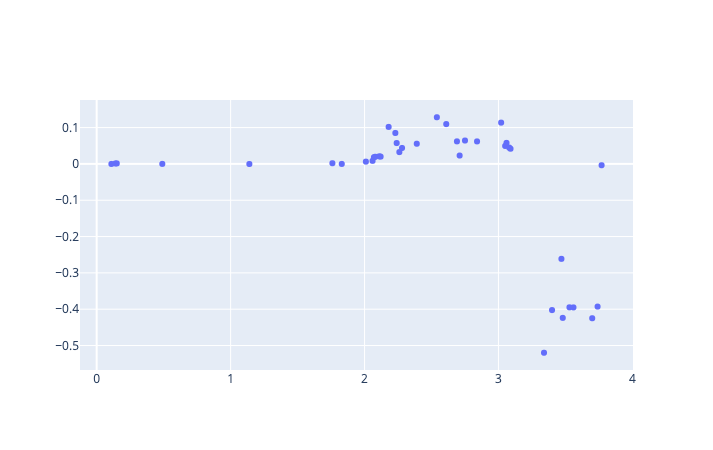

In [136]:
x, y = zip(*myplot28)
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))
fig.show()